# Linear Regression

By Jen Selby and Carl Shan

This Jupyter Notebook will introduce to you to how to make a Linear Regression model using the Sci-kit Learn (aka `sklearn`) Python library.

You can see basic example here:
> http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

and full documentation of the sklearn linear_model module here:
> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Instructions

0. Make sure you've read and learned a bit about the Linear Regression model. [Click here for course notes.](https://jennselby.github.io/MachineLearningCourseNotes/#linear-regression)
1. Read through the instructions and code behind the following sections:

    * [Setup](#Setup)
    * [Fake Data Generation](#Fake-Data-Generation)
    * [Training](#Training)
    * [Results and Visualization](#Results-and-Visualization)
2. Then, pick and complete at least one of the set of exercises (Standard or Advanced) and write code that answers each set of questions.
    * [Option 1 - Standard Difficulty](#Exercise-Option-#1---Standard-Difficulty)
    * [Option 2 - Standard Difficulty](#Exercise-Option-#2---Standard-Difficulty)
    * [Option 3 - Advanced Difficulty](#Exercise-Option-#3---Advanced-Difficulty)
    * [Option 4 - Advanced Difficulty](#Exercise-Option-#4---Advanced-Difficulty)

## Setup

First, make sure you have installed all of the necessary Python libraries, following [the instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3).

You should have `sklearn`, `numpy`, `matplotlib` and `pandas` installed.

If you haven't installed them, use `pip install <library here>` to install them in your Terminal.

Next, we want to make sure we can display our graphs in this notebook and import all of the libraries we'll need into the notebook.

In [384]:
# We're going to be doing some plotting, and we want to be able to see these plots.
# To display graphs in this notebook, run this cell.
%matplotlib inline

In [385]:
# We're now going to import some important libraries

import numpy.random # for generating a noisy data set
from sklearn import linear_model # for training a linear model

import matplotlib.pyplot # for plotting in general
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

import pandas as pd

## Fake Data Generation

We're going to generate some fake data to test out our ideas about linear regression. These constant variables decide some of the characteristics of our data: the `x` range (which will also be used to set the size of the graph later) and how many inputs we should generate.

In [386]:
# Setting the limits and number of our first, X, variable

MIN_X = -10
MAX_X = 10
NUM_INPUTS = 50

### Fake Dataset 1 - Single x Variable

Our first dataset has just one input feature. We are going to pick out 50 random real numbers between our min and max. Then, we will generate one output for each of these inputs following the function $y = 0.3x + 1$.

In [387]:
# randomly pick numbers for x
x_one_x = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1))

print(x_one_x)

[[-7.69380878]
 [ 7.31395277]
 [-7.48570146]
 [-6.97990255]
 [ 0.80830724]
 [ 8.88473515]
 [ 6.08350688]
 [ 4.91665901]
 [-2.45432263]
 [ 1.71889264]
 [ 2.3954849 ]
 [-5.23244199]
 [ 5.57652641]
 [ 1.00446098]
 [-7.53390061]
 [-6.91543309]
 [-6.29856561]
 [-4.30617532]
 [-0.28968533]
 [-8.35755807]
 [ 4.21486645]
 [ 0.08118207]
 [ 8.49212514]
 [-0.69504064]
 [ 6.7321295 ]
 [-9.44597338]
 [ 4.76431683]
 [-9.77490841]
 [ 4.78250837]
 [-2.84048787]
 [-1.04135953]
 [ 0.88670141]
 [-5.50333195]
 [-3.98336299]
 [ 7.65428463]
 [ 8.84640619]
 [-7.28001374]
 [-1.23472427]
 [ 0.24439332]
 [ 2.01200155]
 [-6.8386999 ]
 [ 2.58045486]
 [ 5.47173445]
 [-9.09656976]
 [-7.2446856 ]
 [-3.56141759]
 [ 4.51629056]
 [-6.57871155]
 [-7.3072091 ]
 [-8.8600206 ]]


Let's store this data into a `pandas` `DataFrame` object and name the column `'x'`.

In [388]:
data_one_x = pd.DataFrame(data=x_one_x, columns=['x'])
data_one_x.head()

,x
0,-7.693809
1,7.313953
2,-7.485701
3,-6.979903
4,0.808307


Cool. Now we have some fake `x` data.

Let's make the fake `y` data now.

Let's try to make data that follows the equation: $y = 0.3x + 1$.

In [389]:
m=0.3
b=1

# Random values
#m = numpy.random.uniform(-1,1)
#b = numpy.random.uniform(-2,2)

data_one_x['y'] = m * data_one_x['x'] + b

<AxesSubplot:xlabel='x', ylabel='y'>

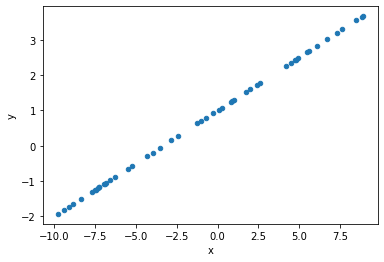

In [390]:
data_one_x.plot.scatter(x='x', y='y', )

Okay. That looks *too* perfect.

Most data in the real world look less linear than that.

So let's add a little bit of noise. Noise are random pertubations to your data that happens naturally in the real world. We will simulate some noise.

Otherwise our linear model will be too easy.

**Note:** We can generate some noise by picking numbers in a [normal distribution (also called bell curve)](http://www.statisticshowto.com/probability-and-statistics/normal-distributions/) around zero.

In [391]:
# First, let's create some noise to make our data a little bit more spread out.

# generate some normally distributed noise
noise_one_x = numpy.random.normal(size=NUM_INPUTS)

In [392]:
# Now let's create the 'y' variable
# It turns out you can make a new column in pandas just by doing the below.
# It's so simple!
data_one_x['y'] = data_one_x['y'] + noise_one_x

<AxesSubplot:xlabel='x', ylabel='y'>

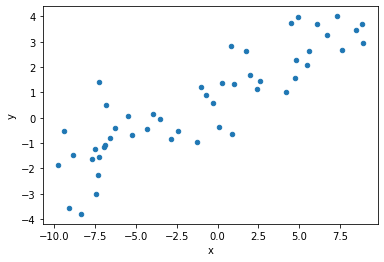

In [393]:
data_one_x.plot.scatter(x='x', y='y')

Great!

This looks more like real data now.

## Training

Now that we have our data, we can train our model to find the best fit line. We will use the linear model module from the scikit-learn library to do this.

Note: you may get a warning about LAPACK. According to [this discussion on the scikit-learn github page](https://github.com/scipy/scipy/issues/5998), this is safe to ignore.

In [394]:
# This creates an "empty" linear model

model_one_x = linear_model.LinearRegression()


First, we need to reshape our data.

Currently, our data looks like the following:

```python
# data_one_x['x'] looks like
[-3.44342026,  9.60082542,  4.99683803,  7.11339915,  9.69287893, ...]

```

In other words, it's just a list.

However, this isn't sufficient.

That's because later on, we will use a command called `.fit()` and this command expects our data to look like a list of lists.

For example:

```python
[[-3.44342026],
[ 9.60082542],
[ 4.99683803],
[ 7.11339915],
[ 9.69287893],
[-5.1383316 ],
[ 8.96638209],
...
[-9.12492363]]
```

We will use a the command `.reshape()`.

In [395]:
# Run this code
x_one_x = data_one_x['x'].values.reshape(-1, 1)
y_one_x = data_one_x['y'].values.reshape(-1, 1)

There we go. Now we can "fit" the data.

"Fitting" the data means to give the "empty model" real data and ask it to find the "best parameters" that "best fits" the data.

Using the amazing `sklearn` library, it's as easy as running the `.fit()` command.

Note: you may get a warning about LAPACK. According to [this discussion on the scikit-learn github page](https://github.com/scipy/scipy/issues/5998), this is safe to ignore.

In [396]:
# Run this code
model_one_x.fit(X=x_one_x, y=y_one_x)

LinearRegression()

## Results and Visualization

Now, let's see what our model learned. We can look at the results numerically:

In [397]:
def print_model_fit(model):
    # Print out the parameters for the best fit line
    print('Intercept: {i}  Coefficients: {c}'.format(i=model.intercept_, c=model.coef_))

In [398]:
print_model_fit(model_one_x)

Intercept: [0.92463854]  Coefficients: [[0.3075571]]


In [399]:
## How would this model make predictions?

# Let's make some new data that have the following values and see how to predict their corresponding 'y' values.

# Print out the model's guesses for some values of x
new_x_values = [ [-1.23], [0.66], [1.98] ]

predictions = model_one_x.predict(new_x_values)

print(predictions)

[[0.54634331]
 [1.12762623]
 [1.5336016 ]]


In [400]:
# Let's print them a little bit nicer
for datapoint, prediction in zip(new_x_values, predictions):
    print('Model prediction for {}: {}'.format(datapoint[0], prediction))

Model prediction for -1.23: [0.54634331]
Model prediction for 0.66: [1.12762623]
Model prediction for 1.98: [1.5336016]


We can also look at them graphically.

In [401]:
def plot_best_fit_line(model, x, y, function, labels):
    # create the figure
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('Data and Best-Fit Line')
    matplotlib.pyplot.xlabel('x values')
    matplotlib.pyplot.ylabel('y values')

    # put the generated dataset points on the graph
    matplotlib.pyplot.scatter(x, y)
    
    # Now we actually want to plot the best-fit line.
    # To simulate that, we'll simply generate all the
    # inputs on the graph and plot that.
    # predict for inputs along the graph to find the best-fit line
    X = numpy.linspace(MIN_X, MAX_X) # generates all the possible values of x
    Y1 = model.predict(list(zip(X)))
    matplotlib.pyplot.plot(X, Y1, label=labels[0])
    
    if function:
        matplotlib.pyplot.plot(X, function(X), label=labels[1])
        
    matplotlib.pyplot.legend()

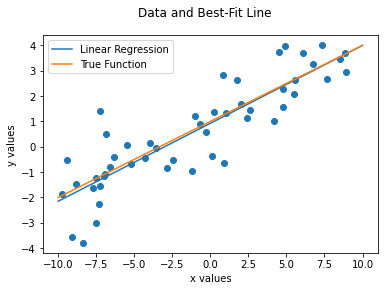

In [402]:
plot_best_fit_line(model_one_x, x_one_x, y_one_x, lambda x:m*x+b, ["Linear Regression", "True Function"])

In [403]:
def L2_metric_one(model, data):
    predictions = [model.predict([[i]])[0] for i in data['x']]
    sq_diff = [(data['y'][i]-predictions[i])**2 for i in range(NUM_INPUTS)]
    return(sum(sq_diff))

L2_metric_one(model_one_x, data_one_x)

array([48.08566377])

# Exercise Option #1 - Standard Difficulty

Answer the following questions about dataset 1:
1. Take a look at the output of the `print_model_fit()` function in the "Results and Visualization" section above. What numbers did you expect to see printed if the linear regression code was working, and why?
1. What numbers did you expect the model to predict when we gave it our new x values, -1.23, 0.66, and 1.98, and why?
1. What did you expect to see on the graph if the linear regression code was working, and why?
1. Pick some lines of code that you could change to continue testing that the linear regression worked properly. What lines did you choose and how did you change them? How did the output change, and why does that tell you that the code is working correctly?

1. You would expect the outputs of `print_model_fit()` to be approximately `Intercept: [1]  Coefficients: [[0.3]]`. This is because the underlying dataset was modeled exactly by the equation $y=0.3x+1$ and noise was added afterwards.
2. You would expect approximately the outputs `[0.631, 1.198, 1.594]`, as these are the exact results from using $y=0.3x+1$. The actual results, at least from this run, were `[0.497, 1.089, 1.502]`, so we see that there is an appreciable error (the average percent error was around 12%, with the first point being the most off at around 20%).
3. You would expect the graph to show a scatter plot of the data points with a line of best fit through said points; this line would ideally be close to the graph of $y=0.3x+1$.
4. The three things I changed/added were:
   1. I made it so the initial slope/intercept values are chosen randomly. By running the model multiple times with different values, one can check that it works for more cases.
   2. I changed the plot to also include the graph of the original slope intercept values. This can be used to qualitatively check if the models prediction deviates significantly from the underlying truth.
   3. I added a function to actually return the $L_2$ metric of the predicted and true $y$ values. This gives a more quantative measure of the accuracy of the model, though it is admittedly a bit useless without something to compare with.

### Fake Dataset 2 - Two x Values

Let's look at a dataset has two inputs, like [the tree example in our notes](https://jennselby.github.io/MachineLearningCourseNotes/#linear-regression).

**NOTE**: This will make it a littler harder to visualize, particularly because you cannot rotate the graph interactively in the Jupyter notebook. If you are interested in looking more closely at this graph, you can copy the code below in the next several cells into a file and run it through Python normally. This will open a graph window that will allow you to drag to rotate the graph.

In [404]:
# generate some normally distributed noise
noise_two_x = numpy.random.normal(size=NUM_INPUTS)

# randomly pick pairs of numbers for x
x1_two_x = numpy.random.uniform(low=MIN_X, high=MAX_X, size=NUM_INPUTS)
x2_two_x = numpy.random.uniform(low=MIN_X, high=MAX_X, size=NUM_INPUTS)


# Random mode
#[x1_coeff,x2_coeff,inter]= [numpy.random.uniform(-1,1),numpy.random.uniform(-1,1),numpy.random.uniform(-2,2)]

[x1_coeff,x2_coeff,inter]= [0.5,-2.7,-2]

y_two_x = x1_coeff * x1_two_x + x2_coeff* x2_two_x + inter + noise_two_x

In [405]:
data_two_x = pd.DataFrame(data=x1_two_x, columns = ['x1'])

In [406]:
data_two_x['x2'] = x2_two_x
data_two_x['y'] = y_two_x

In [407]:
data_two_x.head()

,x1,x2,y
0,1.837903,-2.285054,4.909443
1,-0.123156,-8.440171,19.465536
2,0.804073,-6.745842,17.448843
3,-6.957621,-8.671175,17.023629
4,-2.507885,7.169496,-21.839371


In [408]:
# use scikit-learn's linear regression model and fit to our data
model_two_x = linear_model.LinearRegression()
model_two_x.fit(data_two_x[['x1', 'x2']], data_two_x['y'])

# Print out the parameters for the best fit plane
print_model_fit(model_two_x)

Intercept: -2.1059022857993854  Coefficients: [ 0.46632096 -2.70815974]


In [409]:
## Now create a function that can plot in 3D
def plot_3d(model, x1, x2, y):
    # 3D Plot
    # create the figure
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('3D Data and Best-Fit Plane')
    
    # get the current axes, and tell them to do a 3D projection
    axes = fig.gca(projection='3d')
    axes.set_xlabel('x1')
    axes.set_ylabel('x2')
    axes.set_zlabel('y')
    
    
    # put the generated points on the graph
    axes.scatter(x1, x2, y)

    # predict for input points across the graph to find the best-fit plane
    # and arrange them into a grid for matplotlib
    X1 = X2 = numpy.arange(MIN_X, MAX_X, 0.05)
    X1, X2 = numpy.meshgrid(X1, X2)
    Y = numpy.array(model.predict(list(zip(X1.flatten(), X2.flatten())))).reshape(X1.shape)
    
    Y_true=numpy.array(x1_coeff*X1+x2_coeff*X2+inter).reshape(X1.shape)

    # put the predicted plane on the graph
    axes.plot_surface(X1, X2, Y, alpha=0.1, color=[1,0,0])
    axes.plot_surface(X1, X2, Y_true, alpha=0.1, color=[0,0,1])

    # show the plots
    matplotlib.pyplot.show()

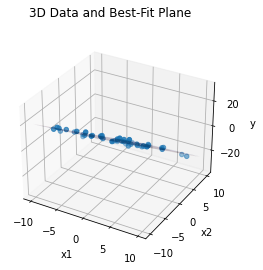

In [410]:
# Now let's use the function
plot_3d(model_two_x, x1_two_x, x2_two_x, y_two_x)

In [411]:
def L2_metric_two(model, data):
    predictions = [model.predict([[i,j]])[0] for i, j in zip(data['x1'],data['x2'])]
    sq_diff = [(data['y'][i]-predictions[i])**2 for i in range(len(predictions))]
    return(sum(sq_diff))

L2_metric_two(model_two_x, data_two_x)

47.756496153366655

# Exercise Option #2 - Standard Difficulty

Now, answer the following questions about [Fake Dataset 2](#Fake-Dataset-2---Two-x-Values):
1. Take a look at the output of the `print_model_fit()` function for this above dataset. What output did you expect to see printed if the linear regression code was working, and why?
1. What did you expect to see on the graph if the linear regression code was working, and why?
1. Pick some lines of code that you could change to continue testing that the linear regression worked properly. What lines did you choose and how did you change them? How did the output change, and why does that tell you that the code is working correctly?
1. Explain any differences you noticed between working with dataset 1 and dataset 2.

1. Again, one would expect an output similar to `Intercept: -2 Coefficients: [0.5, -2.7]` because these are the original values used to generate the data.
1. Ideally, one would see a 3d graph with x1 and x2 as the domain and y as the range with points plotted according to the data set. One would then expect to see a transparent plane of best fit going through the points, as the plot_3d function plots a surface of the models predictions over a mesh of points.
1. I did basically the same things as I did in the previous exercise (i.e. make initial coefficients random, plot the surface with the underlying coefficients, and add an output for the L2 metric).
1. Dataset 2 is inherently more complicated because there are two independent variables to deal with; it was somewhat complicated to figure out how exactly everything works when moving up a dimension. 



### Fake Dataset 3 - Quadratic

The new equation we'll try to model is $y = 0.7x^2 - 0.4x + 1.5$.


This dataset still just has one input, so the code is very similar to our first one. However, now the generating function is quadratic, so this one will be trickier to deal with.

Again, we'll go through dataset generation, training, and visualization.

In [412]:
# randomly pick numbers for x
x_quadratic = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1))

data_quadratic = pd.DataFrame(data=x_quadratic, columns=['x'])

In [413]:
# Let's create some noise to make our data a little bit more spread out.
# generate some normally distributed noise
noise_quadratic = numpy.random.normal(size=NUM_INPUTS)

In [414]:
# Let's generate the y values
# Our equation:
# y = 0.7x^2 - 0.4x + 1.5
data_quadratic['y'] = 0.7 * data_quadratic['x'] * data_quadratic['x'] - 0.4 * data_quadratic['x'] + 1.5 + noise_quadratic

Intercept: [18.32721747]  Coefficients: [[-1.01052375]]


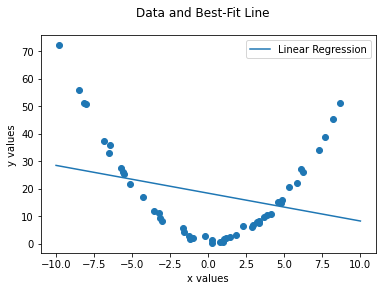

In [415]:
# get a 1D array of the input data
x_quadratic = data_quadratic['x'].values.reshape(-1, 1)
y_quadratic = data_quadratic['y'].values.reshape(-1, 1)

# Let's try use scikit-learn's linear regression model and fit to our data
model_quadratic = linear_model.LinearRegression()
model_quadratic.fit(x_quadratic, y_quadratic)

# show results
print_model_fit(model_quadratic)
plot_best_fit_line(model_quadratic, x_quadratic, y_quadratic, False, ["Linear Regression"])

# Exercise Option #3 - Advanced Difficulty

First, look over and understand the data for [Fake Dataset 3](#Fake-Dataset-3---Quadratic).

There are some issues here. Clearly the linear model that we have isn't working great.

Your challenge is to write some new code that will better fit a linear model to this data. There are a couple different ways to do this, but all of them will involve some new code. If you have ideas but just aren't sure how to translate them into code, please ask for help!

In [416]:
#Defining some functions needed for quadratic regression calculation
def x_sum(n):
    return(sum([x**n for x in x_quadratic])[0])

def xy_sum(n):
    return(sum([x**n * y for x,y in zip(x_quadratic,y_quadratic)])[0])

#Coefficient and dependent variable arrays
coeff=numpy.array([[x_sum(4-i-j) for i in range(3)] for j in range(3)])
dependent=numpy.array([xy_sum(2-i) for i in range(3)])

#Solve for independent variables
[A,B,C]=numpy.linalg.solve(coeff,dependent)

#Midpoint of quadratic, used to split data into upper and lower portions
midpoint=-B/(2*A)

upper_x_quadratic=[x for x in x_quadratic if x>=midpoint]
upper_y_quadratic=[y for (x,y) in zip(x_quadratic,y_quadratic) if x>=midpoint]

upper_model_quadratic = linear_model.LinearRegression()
upper_model_quadratic.fit(upper_x_quadratic, upper_y_quadratic)

lower_x_quadratic=[x for x in x_quadratic if x<midpoint]
lower_y_quadratic=[y for (x,y) in zip(x_quadratic,y_quadratic) if x<midpoint]

lower_model_quadratic = linear_model.LinearRegression()
lower_model_quadratic.fit(lower_x_quadratic, lower_y_quadratic)

LinearRegression()

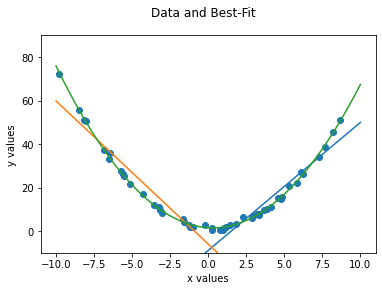

In [417]:
def plot_quadratic_model(lines, upper_model, lower_model, x, y, function):
    # create the figure
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('Data and Best-Fit')
    matplotlib.pyplot.xlabel('x values')
    matplotlib.pyplot.ylabel('y values')
    matplotlib.pyplot.ylim(-10, 90)

    # put the generated dataset points on the graph
    matplotlib.pyplot.scatter(x, y)
    
    # Now we actually want to plot the best-fit line.
    # To simulate that, we'll simply generate all the
    # inputs on the graph and plot that.
    # predict for inputs along the graph to find the best-fit line
    X = numpy.linspace(MIN_X, MAX_X) # generates all the possible values of x
    if lines:
        Y1 = upper_model.predict(list(zip(X)))
        Y2 = lower_model.predict(list(zip(X)))

        matplotlib.pyplot.plot(X, Y1)
        matplotlib.pyplot.plot(X, Y2)
    
    if function:
        matplotlib.pyplot.plot(X, function(X))
        
plot_quadratic_model(True, upper_model_quadratic, lower_model_quadratic, x_quadratic, y_quadratic, lambda x: A*x**2+B*x+C)

The graph above displays the two linear fits, as well as the quadratic fit.

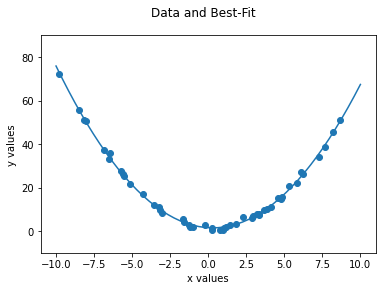

In [418]:
plot_quadratic_model(False, 0, 0, x_quadratic, y_quadratic, lambda x: A*x**2+B*x+C)

This is just the quadratic fit.

# Exercise Option #4 - Advanced Difficulty

Try adding some [regularization](https://jennselby.github.io/MachineLearningCourseNotes/#regularization-ridge-lasso-and-elastic-net) to your linear regression model. This will get you some practice in using the sci-kit learn documentation to find new functions and figure out how to use them.



array([48.08572105])

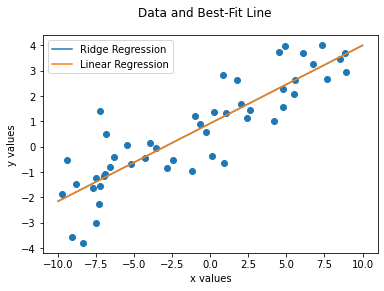

In [419]:
#Ridge Regularization
model_reg1_x = linear_model.Ridge()
model_reg1_x.fit(X=x_one_x, y=y_one_x)

plot_best_fit_line(model_reg1_x, x_one_x, y_one_x, 
                   lambda x:model_one_x.predict(x.reshape(-1,1)), ["Ridge Regression", "Linear Regression"])

L2_metric_one(model_reg1_x, data_one_x)

49.601330008384274

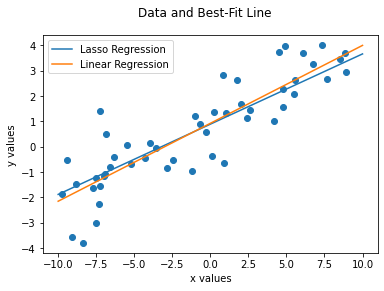

In [420]:
#Lasso Regularization
model_reg2_x = linear_model.Lasso()
model_reg2_x.fit(X=x_one_x, y=y_one_x)

plot_best_fit_line(model_reg2_x, x_one_x, y_one_x, 
                   lambda x:model_one_x.predict(x.reshape(-1,1)), ["LASSO Regression", "Linear Regression"])

L2_metric_one(model_reg2_x, data_one_x)

Both of the regularized models end up extremely similar to the unregularized linear model, likely due to the relative simplicity of the data we are using to train the models. However, they are still both producing different results. In the case of the LASSO regularization, this is apparent from the graph, while for the Ridge regularization this is apparent from comparing the L2 metrics (the Ridge regularization's is slightly higher).

Overall, it is not that surprising that the models are so similar to the linear model in the end. Both of these reguralization methods punish large weights, however our model only has one weight (intercept is not a weight), which has a small value compared to the noise and variation in the data set (at least when it is around 0.3). As such, the punishments introduced by both regularization methods do not become very apparent, so the standard L2 error is the dominant part. This is especially the case with Ridge regularization, as our weight has absolute value less than 1 meaning that squaring it actually decreases its value further. 

It is good to note that both of these models have higher L2 errors than the linear model. This is what we would expect, as pure linear regresssion only optimizes the L2 error; as such, it should have the lowest possible L2 error out of all linear models. Both regularization methods used here sacrifice some of the L2 error optimization to reduce overfitting and large coefficients, so it is expected that they do worse in this regard.